In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format
import matplotlib.pyplot as plt

In [ ]:
# INRIX
# Speed — The current estimated harmonic mean speed for the roadway segment in miles per hour.
# Historical Average Speed — The historical average speed for the roadway segment for that hour of the day and day of the week in miles per hour.
# Reference Speed — The calculated "free flow" mean speed for the roadway segment in miles per hour. This attribute is calculated based upon the 66th-percentile point of the observed speeds on that segment for all time periods, which establishes a reliable proxy for the speed of traffic at free-flow for that segment.
# Travel Time — Time it will take to drive along the roadway segment (Distance Traveled / Speed).
# Confidence score — This is a simple confidence factor.
# 30 — high confidence, based on real-time data for that specific segment
# 20 — medium confidence, based on real-time data across multiple segments and/or based on a combination of expected and real-time data
# 10 — lower confidence, based primarily on historical data or road reference speeds
# C-Value — Indicates the probability that the current probe reading represents the actual roadway conditions based on recent and historical trends. This value is only used when the confidence score is 30. (0 = low probability, 100 = high probability)

# Metadata fields
# These fields are associated with each segment:datasource - the data set this record comes from. This field is only included in Massive Data Downloader exports when choosing to merge the data sets into a single CSV file.
# tmc - the unique 9-digit value identifying the segment.
# road - the route number or common name of the roadway
# direction - the overall direction of the roadway
# intersection - the cross street and/or interchange associated with the segment
# state - the postal abbreviation of the state to which the segment is assigned
# miles - the length of the segment
# road_order - a numerical value indicating in what order the segment would be encountered when traveling downstream relative to the other segments on the same road
# start_latitude - the latitude of the beginning of

# Venue polygon and shuttle points

In [3]:
# Create a polygon for event venue
from shapely.geometry import Polygon
import geopandas as gpd

lat_point_list = [30.131962, 30.146337, 30.140386, 30.122629]
lon_point_list = [-97.647388, -97.635686, -97.619652, -97.631465]
polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
polygon = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])       
polygon['name']  = 'the Circuit of the Americas'
polygon
# polygon.explore()

geometry                         name
0  POLYGON ((-97.64739 30.13196, -97.63569 30.14634, -97.61965 30.14039, -97.63147 30.12263, -97.64739 30.13196))  the Circuit of the Americas

In [4]:
import shapely.geometry as geom

# Create Shapely point geometries
point_waterloo_park = geom.Point(-97.736285, 30.273726) # (longitude, latitude)
point_barton_creek_square = geom.Point(-97.805046, 30.257509)
point_expo_center = geom.Point(-97.622544, 30.297062)
point_ridehailing = geom.Point(-97.614135, 30.178718)

point_shuttle_list = [point_waterloo_park,point_barton_creek_square,point_expo_center,point_ridehailing]
gdf_shuttle = gpd.GeoDataFrame({'Shuttle_Location': ['Shuttle_Waterloo_Park', 'Shuttle_Barton_Creek_Square', 'Shuttle_Expo_Center', 'Uber_DelValle_HighSchool'],
                        'geometry': point_shuttle_list},
                        crs="EPSG:4326")
gdf_shuttle

Shuttle_Location                    geometry
0  Shuttle_Waterloo_Park        POINT (-97.73628 30.27373)
1  Shuttle_Barton_Creek_Square  POINT (-97.80505 30.25751)
2  Shuttle_Expo_Center          POINT (-97.62254 30.29706)
3  Uber_DelValle_HighSchool     POINT (-97.61414 30.17872)

# This is all Austin INRIX traffic volume data
Downsamping data - takes 5min ish (only need to run once)

In [5]:
# %%time
# # 10.14, 10.15, 10.16 
# # 10.21, 10.22, 10.23
# # start_date, end_date = '2022-10-14 00:00:00','2022-10-16 23:59:59'
# start_date, end_date = '2022-10-21 00:00:00','2022-10-23 23:59:59'
# filtered_chunks = []

# # Read the CSV in chunks
# chunk_size = 100000  # Adjust the chunk size based on your memory capacity
# desire_frequency_min = '10T'

# for chunk in pd.read_csv("data/INRIX/Austin_20221/Austin_20221.csv", parse_dates=['measurement_tstamp'], chunksize=chunk_size):
# # for chunk in pd.read_csv("data/INRIX/Austin_20222/Austin_20222.csv", parse_dates=['measurement_tstamp'], chunksize=chunk_size):
#     # Filter the chunk by date range
#     filtered_chunk = chunk[(chunk['measurement_tstamp'] >= start_date) & (chunk['measurement_tstamp'] <= end_date)]
    
#     # Select only the first record in each 10-minute interval
#     downsampled_chunk = filtered_chunk[filtered_chunk['measurement_tstamp'].dt.floor(desire_frequency_min).diff() != '0T']

#     filtered_chunks.append(downsampled_chunk)
    
# # Concatenate all filtered chunks into a single DataFrame
# filtered_df = pd.concat(filtered_chunks)
# print(filtered_df.shape[0])

In [125]:
# # filtered_df[filtered_df['tmc_code']=='112P13033']
# print(filtered_df.shape[0])
# # filtered_df.to_csv('data/INRIX/austin_20221014_1016_10min_interval.csv',index=False)
# filtered_df.to_csv('data/INRIX/austin_20221021_1023_10min_interval.csv',index=False)

1923456


In [127]:
# df_traffic1 = pd.read_csv("data/INRIX/austin_20221021_1023_10min_interval.csv", sep=',', header=0)
# df_traffic2 = pd.read_csv("data/INRIX/austin_20221014_1016_10min_interval.csv", sep=',', header=0)
# combined_df = pd.concat([df_traffic1, df_traffic2], ignore_index=True)
# print(combined_df.shape[0])
# combined_df.to_csv('data/INRIX/austin_2022_GP_10min_interval.csv',index=False)

3846034


# Load road network information

In [74]:
df_road = pd.read_csv("data/TMC_Identification.csv", sep=',', header=0)
# print(df_road.type.unique())
# print(sorted(df_road.road_order.unique()))
df_road.head(2)

tmc_code          road   direction                  intersection state   county    zip  start_latitude  start_longitude  end_latitude  end_longitude   miles  road_order    timezone_name   type country          active_start_date            active_end_date
0  112P13033  GUADALUPE ST  NORTHBOUND  W MARTIN LUTHER KING JR BLVD  TX    TRAVIS   78705 30.28172        -97.74193        30.28232      -97.74207      0.04249 1.00000      America/Chicago  P1.11  USA     2022-03-22 14:00:00-04:00  2023-03-21 14:00:00-04:00
1  112+08908  TX-21         EASTBOUND   FM-20                         TX    BASTROP  78602 30.11066        -97.41049        30.11082      -97.37323      2.22783 21.00000     America/Chicago  P1.11  USA     2022-03-22 14:00:00-04:00  2023-03-21 14:00:00-04:00

In [76]:
# df_road = pd.read_csv("data/TMC_Identification.csv", sep=',', header=0)
print(df_road.columns)
df_road = df_road[['tmc_code','intersection','start_latitude','start_longitude','end_latitude','end_longitude','miles','road_order']]
df_road.head(3)

Index(['tmc_code', 'road', 'direction', 'intersection', 'state', 'county', 'zip', 'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'miles', 'road_order', 'timezone_name', 'type', 'country', 'active_start_date', 'active_end_date'], dtype='object')


tmc_code                  intersection  start_latitude  start_longitude  end_latitude  end_longitude   miles  road_order
0  112P13033  W MARTIN LUTHER KING JR BLVD 30.28172        -97.74193        30.28232      -97.74207      0.04249 1.00000    
1  112+08908  FM-20                        30.11066        -97.41049        30.11082      -97.37323      2.22783 21.00000   
2  112+16538  GATTIS SCHOOL RD             30.49057        -97.67514        30.49351      -97.67573      0.20831 2.00000

In [7]:
# !pip install folium matplotlib mapclassify

In [78]:
%%time
from shapely.geometry import LineString
from geopandas import GeoDataFrame

df_road['geometry'] = df_road.apply(
    lambda row: LineString([(row['start_longitude'], row['start_latitude']),
                             (row['end_longitude'], row['end_latitude'])]),
    axis=1
)

# Create a GeoDataFrame
gdf_road = GeoDataFrame(df_road, geometry='geometry',crs="EPSG:4326")

CPU times: user 144 ms, sys: 45.7 ms, total: 190 ms
Wall time: 142 ms


The data only contain major or primary road segments, might not observe minor roads

In [27]:
# # show all the road segments in Austin
# gdf_road.explore(
#     legend=False
# )

# Load traffic data

In [79]:
%%time
df_traffic = pd.read_csv("data/austin_2022_GP_10min_interval.csv", sep=',', header=0)
print(df_traffic.shape[0])
df_traffic.head(3)

# Speed — The current estimated harmonic mean speed for the roadway segment in miles per hour.
# Historical Average Speed — The historical average speed for the roadway segment for that hour of the day and day of the week in miles per hour.
# Reference Speed — The calculated "free flow" mean speed for the roadway segment in miles per hour. This attribute is calculated based upon the 66th-percentile point of the observed speeds on that segment for all time periods, which establishes a reliable proxy for the speed of traffic at free-flow for that segment.
# Travel Time — Time it will take to drive along the roadway segment (Distance Traveled / Speed).

3846034
CPU times: user 1.61 s, sys: 281 ms, total: 1.89 s
Wall time: 1.88 s


tmc_code   measurement_tstamp    speed  historical_average_speed  reference_speed  travel_time_minutes  confidence_score    cvalue  Inrix 2013  Inrix 2019
0  112P13033  2022-10-21 00:00:00 21.00000 17.00000                  17.00000         0.09000              30.00000          100.00000 2.00000     3.00000    
1  112P13033  2022-10-21 00:10:00 27.00000 17.00000                  17.00000         0.07000              30.00000          90.00000  2.00000     3.00000    
2  112P13033  2022-10-21 00:20:00 29.00000 17.00000                  17.00000         0.07000              30.00000          80.00000  2.00000     3.00000

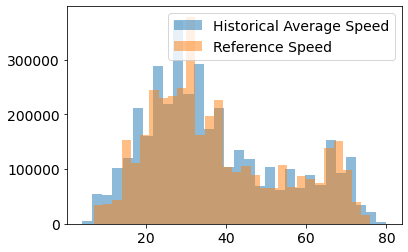

In [86]:
# Plot overlaid histograms
plt.hist(df_traffic['historical_average_speed'], bins=30, alpha=0.5, label='Historical Average Speed')
plt.hist(df_traffic['reference_speed'], bins=30, alpha=0.5, label='Reference Speed')
plt.legend()

In [80]:
df_traffic['Date'] = df_traffic['measurement_tstamp'].astype(str).str[0:10]
df_traffic['Date'] = pd.to_datetime(df_traffic['Date'], errors='coerce')
# start_date, end_date = '2022-10-14','2022-10-16'
# df_traffic_oneweekbefore = df_traffic[(df_traffic['Date']>=start_date)&(df_traffic['Date']<=end_date)]

In [47]:
df_traffic['Date'].unique()

array(['2022-10-21T00:00:00.000000000', '2022-10-22T00:00:00.000000000',
       '2022-10-23T00:00:00.000000000', '2022-10-14T00:00:00.000000000',
       '2022-10-15T00:00:00.000000000', '2022-10-16T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [11]:
%%time
df_traffic_merged = df_traffic.merge(df_road) #, left_on='tmc_code', right_on='tmc'
df_traffic_merged['travel_time_sec'] = df_traffic_merged['travel_time_minutes']*60
df_traffic_merged['measurement_tstamp'] = pd.to_datetime(df_traffic_merged['measurement_tstamp'])
df_traffic_merged['hour_min'] = df_traffic_merged['measurement_tstamp'].dt.strftime('%H:%M')
df_traffic_merged['delay'] = df_traffic_merged['travel_time_sec'] - df_traffic_merged['miles']/df_traffic_merged['historical_average_speed']*3600

CPU times: user 12.9 s, sys: 693 ms, total: 13.6 s
Wall time: 12.6 s


In [75]:
# df_traffic_merged, miles/historical_average_speed 21 17
# 0.04249/21*60*60
# df_traffic_merged[df_traffic_merged['tmc_code']=='112P13033'].historical_average_speed.unique()
# df_traffic_merged[df_traffic_merged['tmc_code']=='112P13033']

In [12]:
df_traffic_merged.loc[df_traffic_merged.delay <= 10, 'delay_level'] = 0
df_traffic_merged.loc[(df_traffic_merged.delay > 10)&(df_traffic_merged.delay <= 30), 'delay_level'] = 1
df_traffic_merged.loc[(df_traffic_merged.delay > 30)&(df_traffic_merged.delay <= 60), 'delay_level'] = 2
df_traffic_merged.loc[(df_traffic_merged.delay > 60)&(df_traffic_merged.delay <= 120), 'delay_level'] = 3
df_traffic_merged.loc[(df_traffic_merged.delay > 120)&(df_traffic_merged.delay <= 300), 'delay_level'] = 4
df_traffic_merged.loc[df_traffic_merged.delay > 300, 'delay_level'] = 5
df_traffic_merged.delay_level.value_counts()

# Very Low Congestion: delay <= 10 seconds
# Low Congestion: 10 < delay <= 30 seconds
# Moderate Congestion: 30 < delay <= 60 seconds
# High Congestion: 60 < delay <= 120 seconds
# Very High Congestion: 120 < delay <= 300 seconds
# Severe Congestion: delay > 300 seconds

0.00000    3580932
1.00000    213719 
2.00000    35780  
3.00000    11004  
4.00000    3677   
5.00000    922    
Name: delay_level, dtype: int64

## Visualizing traffic delay compare to historic average free flow

In [24]:
gdf_road_merged = gdf_road.merge(df_traffic_merged[['tmc_code','Date','hour_min','delay','delay_level']]) #, left_on='tmc', right_on='tmc_code'
gdf_road_merged['Date'] = gdf_road_merged['Date'].astype(str)
print(gdf_road_merged.shape[0])
gdf_road_merged.head()

3846034


tmc_code                  intersection  start_latitude  start_longitude  end_latitude  end_longitude   miles                                             geometry       Date hour_min    delay  delay_level
0  112P13033  W MARTIN LUTHER KING JR BLVD 30.28172        -97.74193        30.28232      -97.74207      0.04249  LINESTRING (-97.74193 30.28172, -97.74207 30.28232) 2022-10-21  00:00   -3.59682 0.00000     
1  112P13033  W MARTIN LUTHER KING JR BLVD 30.28172        -97.74193        30.28232      -97.74207      0.04249  LINESTRING (-97.74193 30.28172, -97.74207 30.28232) 2022-10-21  00:10   -4.79682 0.00000     
2  112P13033  W MARTIN LUTHER KING JR BLVD 30.28172        -97.74193        30.28232      -97.74207      0.04249  LINESTRING (-97.74193 30.28172, -97.74207 30.28232) 2022-10-21  00:20   -4.79682 0.00000     
3  112P13033  W MARTIN LUTHER KING JR BLVD 30.28172        -97.74193        30.28232      -97.74207      0.04249  LINESTRING (-97.74193 30.28172, -97.74207 30.28232) 2022-10-21  00:30   -1.79682 0.00000     
4  112P13033  W MARTIN LUTHER KING JR BLVD 30.28172        -97.74193        30.28232      -97.74207      0.04249  LINESTRING (-97.74193 30.28172, -97.74207 30.28232) 2022-10-21  00:40   -3.59682 0.00000

In [25]:
# gdf_road_merged.to_csv('output/austin_2022_GP_10min_interval_withDelay_geodf.csv',index=False)

In [17]:
%%time

select_vis_date, select_hour_min = '2022-10-23', '20:00'
# gdf_road_merged.delay_level.value_counts()

congestion_colors = ["#00FF00", "#ADFF2F", "#FFFF00", "#FFA500", "#FF0000", "#8B0000"]

m = gdf_road_merged[(gdf_road_merged['Date']==select_vis_date)&(gdf_road_merged['hour_min']==select_hour_min)].explore(
    column='delay_level',
    cmap= congestion_colors, #"rainbow",
    tiles="CartoDB Positron", # OpenStreetMap, CartoDB dark_matter, CartoDB Positron
    categorical=True
)

m = gdf_shuttle.explore(
    m=m,
    markersize=40,
    linewidth=2,
    edgecolor="black",
)

polygon.explore(
    m=m
)

CPU times: user 628 ms, sys: 2.52 ms, total: 630 ms
Wall time: 625 ms


## Compute delay difference using the baseline as the same day from the last week
Using Saturdays as an example

In [18]:
%%time

df_diff_all = pd.DataFrame()

for day_pair in [['2022-10-14','2022-10-21'],['2022-10-15','2022-10-22'],['2022-10-16','2022-10-23']]:
    day1, day2 = day_pair[0],day_pair[1]
    print(day1, day2)
    
    df_baseline = df_traffic_merged[df_traffic_merged['Date']==day1].sort_values(by=['tmc_code','measurement_tstamp'], ascending=True)
    
    df_focus = df_traffic_merged[df_traffic_merged['Date']==day2].sort_values(by=['tmc_code','measurement_tstamp'], ascending=True)
    
    print(df_baseline.shape[0], df_focus.shape[0])

    df_diff = pd.merge(
        df_baseline[['tmc_code', 'hour_min','delay']],
        df_focus[['tmc_code','hour_min', 'delay']],
        on=['tmc_code','hour_min'],
        suffixes=('_baseline', '_focus')
    )
    
    # Calculate the delay difference
    df_diff['delay_difference'] = df_diff['delay_focus'] - df_diff['delay_baseline']
    
    df_diff['date'] = day2

    df_diff_all = pd.concat([df_diff_all, df_diff], ignore_index=True)

2022-10-14 2022-10-21
640864 641152
2022-10-15 2022-10-22
640856 641152
2022-10-16 2022-10-23
640858 641152
CPU times: user 1.79 s, sys: 108 ms, total: 1.9 s
Wall time: 1.89 s


In [125]:
df_diff_all.to_csv('output/austin_2022_GP_10min_interval_delaydifference.csv',index=False)
df_diff_all.date.value_counts()

2022-10-21    640800
2022-10-22    640800
2022-10-23    636350
Name: date, dtype: int64

In [30]:
gdf_road_merged_delaydiff = gdf_road.merge(df_diff_all[['tmc_code','hour_min','date','delay_difference']]) 
print(gdf_road_merged_delaydiff.shape[0]) #11498800
gdf_road_merged_delaydiff.head(2)

1917950


tmc_code                  intersection  start_latitude  start_longitude  end_latitude  end_longitude   miles                                             geometry hour_min        date  delay_difference
0  112P13033  W MARTIN LUTHER KING JR BLVD 30.28172        -97.74193        30.28232      -97.74207      0.04249  LINESTRING (-97.74193 30.28172, -97.74207 30.28232)  00:00    2022-10-21 -0.60000         
1  112P13033  W MARTIN LUTHER KING JR BLVD 30.28172        -97.74193        30.28232      -97.74207      0.04249  LINESTRING (-97.74193 30.28172, -97.74207 30.28232)  00:10    2022-10-21 0.00000

In [35]:
%%time

select_vis_date, select_hour_min = '2022-10-22', '20:00'
# congestion_colors = ["#00FF00", "#ADFF2F", "#FFFF00", "#FFA500", "#FF0000", "#8B0000"]

m = gdf_road_merged_delaydiff[(gdf_road_merged_delaydiff['date']==select_vis_date)&(gdf_road_merged_delaydiff['hour_min']==select_hour_min)].explore(
    column='delay_difference',
    cmap= 'rainbow', #"rainbow",
    tiles="CartoDB Positron", # OpenStreetMap, CartoDB dark_matter, CartoDB Positron
    categorical=False
)

m = gdf_shuttle.explore(
    m=m,
    markersize=40,
    linewidth=2,
    edgecolor="black",
)

polygon.explore(
    m=m
)

CPU times: user 507 ms, sys: 7.65 ms, total: 515 ms
Wall time: 511 ms


## Plot average delay time for the whole Austin network and compare with the average delay from the same day last week

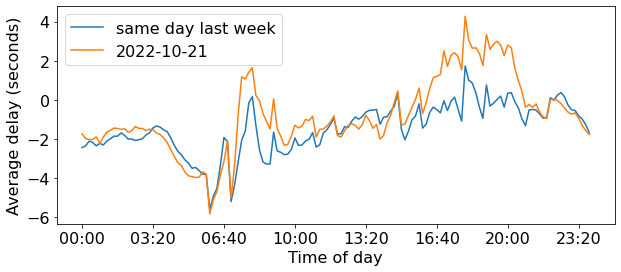

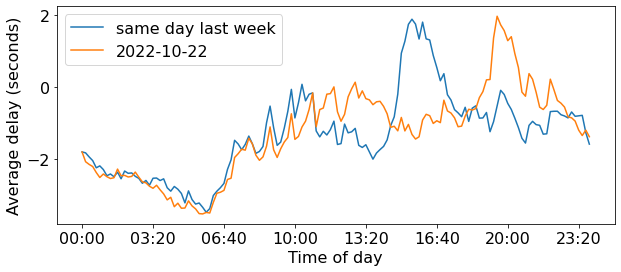

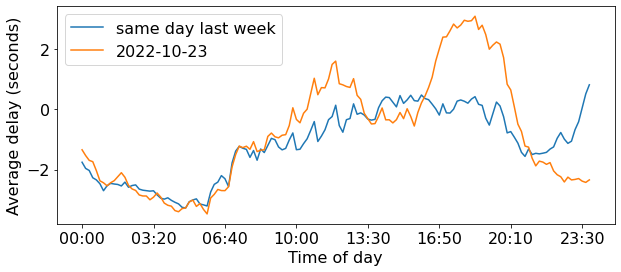

In [57]:
def plot_delay_baseline(df,date):
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(1, figsize=(10, 4))
    df_select = df[df['date']==date]
    df_select.groupby('hour_min').delay_baseline.mean().plot(ax=ax,label='same day last week')
    df_select.groupby('hour_min').delay_focus.mean().plot(ax=ax,label=date)
    plt.xticks(rotation=0)
#     plt.title(date)
    ax.set_ylabel('Average delay (seconds)')
    ax.set_xlabel('Time of day')
    plt.legend()
    plt.show()
    
plot_delay_baseline(df_diff_all,'2022-10-21')
plot_delay_baseline(df_diff_all,'2022-10-22')
plot_delay_baseline(df_diff_all,'2022-10-23')

## Average delay difference for the whole network (current day delay - last week same day delay)

count   640800.00000
mean    0.01701     
std     13.90367    
min     -718.20000  
25%     -1.80000    
50%     0.00000     
75%     1.80000     
max     1009.20000  
Name: delay_difference, dtype: float64


<AxesSubplot:>

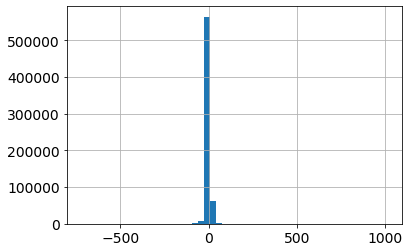

In [164]:
selectOneDate = '2022-10-22' # Saturday
df_diff_select = df_diff_all[df_diff_all['date']==selectOneDate]
plt.rcParams.update({'font.size': 14})
print(df_diff_select.delay_difference.describe())
df_diff_select.delay_difference.hist(bins=50)

In [66]:
import matplotlib.dates as mdates


def plot_delay_diff_oneday(df, date):
    
    plt.rcParams.update({'font.size': 14})
    
    df_diff_select = df[df['date']==date]

    df_diff_new = df_diff_select.groupby('hour_min').delay_difference.mean().reset_index()

    df_diff_new['hour_min'] = pd.to_datetime(df_diff_new['hour_min'], format='%H:%M')

    # Plotting the time series
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the time series
    ax.plot(df_diff_new['hour_min'], df_diff_new['delay_difference'],label='Average Delay Difference')

    # Formatting the x-axis to show hours and minutes
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Adjust interval as needed

    plt.xticks(rotation=90)
    plt.title(date)
    plt.xlabel('Time of day')
    plt.ylabel('Average difference in delay (seconds)')
    plt.axhline(y=0, color='r', linestyle='--')
    # plt.legend()
#     plt.grid()
    plt.tight_layout()
    plt.show()

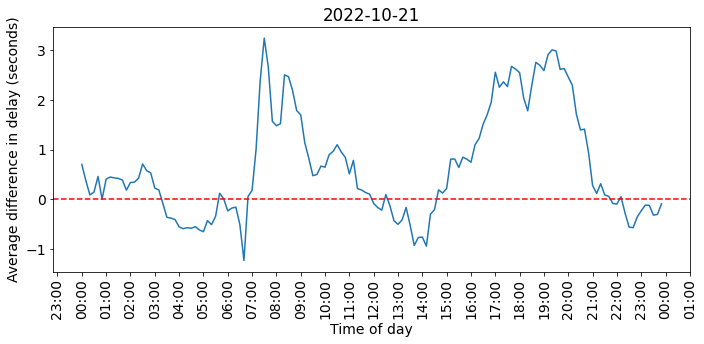

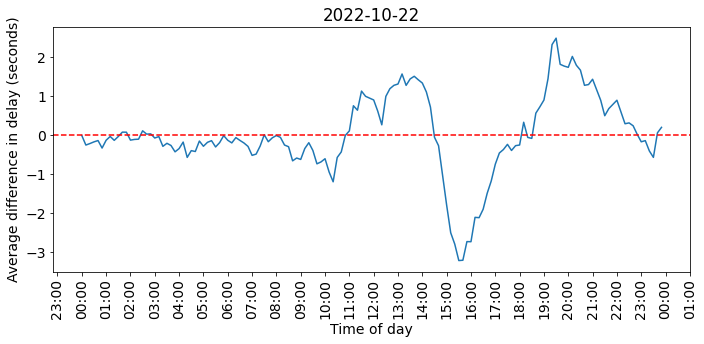

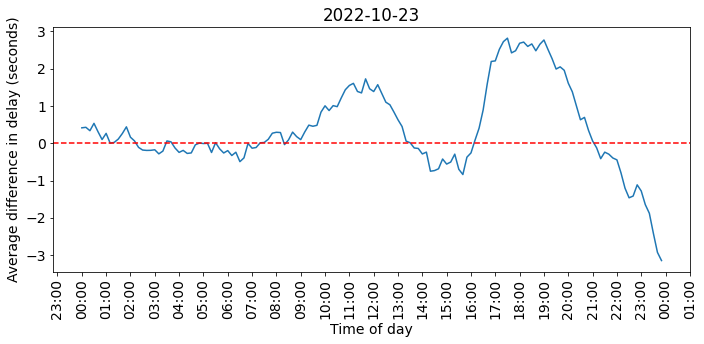

In [67]:
plot_delay_diff_oneday(df_diff_all, '2022-10-21') # Friday 
plot_delay_diff_oneday(df_diff_all, '2022-10-22') # Saturday 
plot_delay_diff_oneday(df_diff_all, '2022-10-23') # Sunday 

In [152]:
df_diff_all.head()

tmc_code hour_min  delay_baseline  delay_focus  delay_difference        date
0  112+04758  00:00   -0.93268        -0.93268     0.00000            2022-10-21
1  112+04758  00:10   -0.93268        -0.93268     0.00000            2022-10-21
2  112+04758  00:20   -0.33268        -0.93268     -0.60000           2022-10-21
3  112+04758  00:30   -0.93268        -0.93268     0.00000            2022-10-21
4  112+04758  00:40   -0.93268        -0.93268     0.00000            2022-10-21